In [1]:
# The provided data folder is uploaded to the google drive
# Import necessary libraries for handling files and JSON data
from google.colab import drive
import os
import json

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# Navigate to the directory containing the dataset
%cd /content/drive/MyDrive

Mounted at /content/drive
/content/drive/MyDrive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [4]:
## Load data
DKA_patients_df = pd.read_csv("/content/DKA_patients.csv")

## Print the output and the for the available column names
print(DKA_patients_df.columns)
DKA_patients_df.head(10)

Index(['subject_id', 'hadm_id', 'glucose_level', 'ph_level',
       'bicarbonate_level', 'ketone_level', 'gender', 'age', 'length_of_stay',
       'cci', 'ama_discharge', 'insurance', 'num_procedures',
       'related__comorbidity', 'readmission'],
      dtype='object')


,subject_id,hadm_id,glucose_level,ph_level,bicarbonate_level,ketone_level,gender,age,length_of_stay,cci,ama_discharge,insurance,num_procedures,related__comorbidity,readmission
0,10005817,28661809,261.300000,7.290000,14.500000,82.500000,M,66,16.000000,0,0,Medicare,6.0,0,0
1,10015860,24698912,269.500000,7.280000,11.833333,64.000000,M,53,0.625000,0,0,Other,8.0,0,0
2,10039708,28258130,266.000000,7.211429,15.029412,64.250000,F,46,16.166667,0,0,Other,21.0,0,0
3,10054716,25339060,261.200000,7.210000,16.500000,192.000000,M,61,6.041667,0,0,Other,7.0,0,0
4,10080961,24032231,559.000000,7.260000,15.777778,32.500000,F,40,4.708333,0,0,Other,16.0,0,0
5,10084586,21898489,285.500000,7.223333,15.444444,63.333333,F,66,5.083333,0,0,Medicare,3.0,1,0
6,10094679,28902523,251.000000,7.155000,17.000000,15.000000,M,64,15.333333,0,0,Other,16.0,1,0
7,10095570,28612694,295.800000,7.192500,13.142857,21.500000,M,63,3.458333,1,0,Other,6.0,3,0
8,10097659,22071424,264.833333,7.242632,17.000000,50.000000,M,71,3.958333,0,0,Medicare,4.0,0,0
9,10098215,21701015,351.000000,7.176667,14.461538,39.000000,F,56,4.250000,1,0,Other,11.0,1,1


In [5]:
DKA_patients_df

,subject_id,hadm_id,glucose_level,ph_level,bicarbonate_level,ketone_level,gender,age,length_of_stay,cci,ama_discharge,insurance,num_procedures,related__comorbidity,readmission
0,10005817,28661809,261.300000,7.290000,14.500000,82.500000,M,66,16.000000,0,0,Medicare,6.0,0,0
1,10015860,24698912,269.500000,7.280000,11.833333,64.000000,M,53,0.625000,0,0,Other,8.0,0,0
2,10039708,28258130,266.000000,7.211429,15.029412,64.250000,F,46,16.166667,0,0,Other,21.0,0,0
3,10054716,25339060,261.200000,7.210000,16.500000,192.000000,M,61,6.041667,0,0,Other,7.0,0,0
4,10080961,24032231,559.000000,7.260000,15.777778,32.500000,F,40,4.708333,0,0,Other,16.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,19928591,27383823,253.090909,7.260000,16.200000,20.333333,M,65,9.208333,0,0,Other,12.0,0,0
980,19929426,24829358,299.000000,7.184000,16.000000,44.000000,M,64,10.708333,0,0,Other,6.0,0,0
981,19935090,20730695,326.666667,7.280000,15.000000,34.000000,F,34,5.416667,0,0,Medicare,1.0,0,0
982,19958337,29604470,253.222222,7.247500,14.250000,39.500000,F,27,7.833333,0,0,Other,20.0,0,0


- Data wrangling
- EDA
- Feature Engineering
- Model Selection and Training
- Model Evaluation
- Interpretation and Reporting

### Data Wrangling

- Missing value
- Data transformation: Transforming Categorical into Numbers (gender, insurance)

In [6]:
pd.set_option('display.max_columns', None) ## This is only to show all columns when printing a DataFrame

# Create a copy of the dataframe to work with
DKA_df = DKA_patients_df.copy()

# Check missing values
print(DKA_df.isnull().sum(),"\n\n")

# Check the type of data for each column. Notice that 'gender' and 'insurance' are categorical (object)
print(DKA_df.info())

subject_id               0
hadm_id                  0
glucose_level            0
ph_level                 0
bicarbonate_level        0
ketone_level             0
gender                   0
age                      0
length_of_stay           0
cci                      0
ama_discharge            0
insurance                0
num_procedures          40
related__comorbidity     0
readmission              0
dtype: int64 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   subject_id            984 non-null    int64  
 1   hadm_id               984 non-null    int64  
 2   glucose_level         984 non-null    float64
 3   ph_level              984 non-null    float64
 4   bicarbonate_level     984 non-null    float64
 5   ketone_level          984 non-null    float64
 6   gender                984 non-null    object 
 7   age       

In [7]:
DKA_df['readmission'].value_counts()

,count
readmission,
0,692
1,292


In [8]:
# test_df = DKA_df.dropna(subset=['num_procedures'])
# test_df

In [9]:
# test_df['readmission'].value_counts()


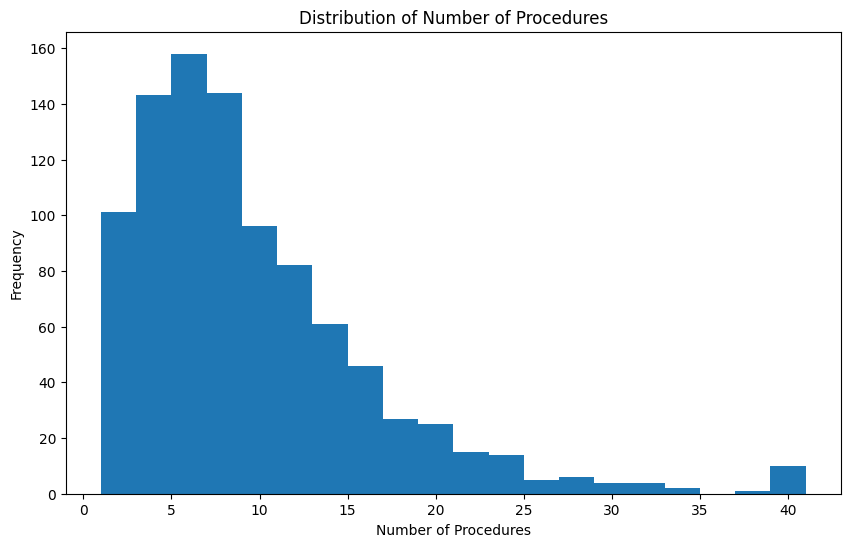

In [10]:
# Plot histogram for the 'num_procedures' column
plt.figure(figsize=(10, 6))
DKA_patients_df['num_procedures'].hist(bins=20)
plt.title('Distribution of Number of Procedures')
plt.xlabel('Number of Procedures')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

In [11]:
# Step 1: Handling Missing Values
# Fill missing values in 'num_procedures' with the median of the column
DKA_df['num_procedures'].fillna(DKA_df['num_procedures'].median(), inplace=True)

# Step 2: Transforming Categorical Data
# For Gender (Male: 1, Female: 0)
DKA_df['gender'] = DKA_df['gender'].map({'M': 1, 'F': 0})


# One-hot encoding for 'insurance'
insurance_dummies = pd.get_dummies(DKA_df['insurance'], prefix='insurance')
DKA_df = pd.concat([DKA_df, insurance_dummies], axis=1)
DKA_df.drop('insurance', axis=1, inplace=True)

# Convert boolean to integers for insurance dummies
DKA_df['insurance_Medicaid'] = DKA_df['insurance_Medicaid'].astype(int)
DKA_df['insurance_Medicare'] = DKA_df['insurance_Medicare'].astype(int)
DKA_df['insurance_Other'] = DKA_df['insurance_Other'].astype(int)

In [12]:
DKA_df

,subject_id,hadm_id,glucose_level,ph_level,bicarbonate_level,ketone_level,gender,age,length_of_stay,cci,ama_discharge,num_procedures,related__comorbidity,readmission,insurance_Medicaid,insurance_Medicare,insurance_Other
0,10005817,28661809,261.300000,7.290000,14.500000,82.500000,1,66,16.000000,0,0,6.0,0,0,0,1,0
1,10015860,24698912,269.500000,7.280000,11.833333,64.000000,1,53,0.625000,0,0,8.0,0,0,0,0,1
2,10039708,28258130,266.000000,7.211429,15.029412,64.250000,0,46,16.166667,0,0,21.0,0,0,0,0,1
3,10054716,25339060,261.200000,7.210000,16.500000,192.000000,1,61,6.041667,0,0,7.0,0,0,0,0,1
4,10080961,24032231,559.000000,7.260000,15.777778,32.500000,0,40,4.708333,0,0,16.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,19928591,27383823,253.090909,7.260000,16.200000,20.333333,1,65,9.208333,0,0,12.0,0,0,0,0,1
980,19929426,24829358,299.000000,7.184000,16.000000,44.000000,1,64,10.708333,0,0,6.0,0,0,0,0,1
981,19935090,20730695,326.666667,7.280000,15.000000,34.000000,0,34,5.416667,0,0,1.0,0,0,0,1,0
982,19958337,29604470,253.222222,7.247500,14.250000,39.500000,0,27,7.833333,0,0,20.0,0,0,0,0,1


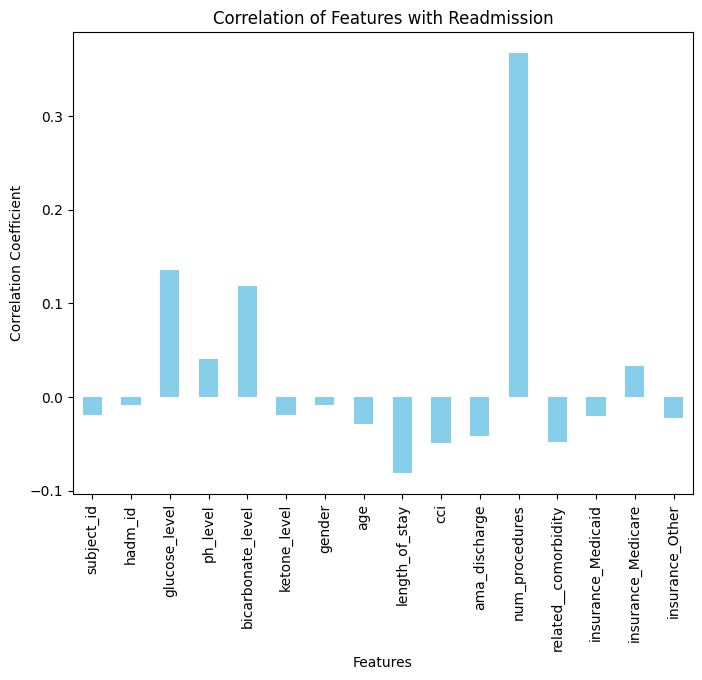

In [13]:
# Correlation with readmission
readmission_corr = DKA_df.corr()['readmission'].drop('readmission')

# Plotting the correlation of features with readmission
plt.figure(figsize=(8, 6))
readmission_corr.plot(kind='bar', color='skyblue')
plt.title('Correlation of Features with Readmission')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=90)
plt.show()

### Address class imbalance with SMOTE

smote

In [14]:
from imblearn.over_sampling import SMOTE

X = DKA_df.drop('readmission', axis=1)  # Features
y = DKA_df['readmission']  # Target

smote = SMOTE(random_state=90089)
X_res, y_res = smote.fit_resample(X, y)

# Check the new class distribution
print(pd.Series(y_res).value_counts())


readmission
0    692
1    692
Name: count, dtype: int64


Under-sampling the Majority Class

In [15]:
from imblearn.under_sampling import RandomUnderSampler

X = DKA_df.drop('readmission', axis=1)  # Features
y = DKA_df['readmission']  # Target

# Implementing Random Under Sampling
rus = RandomUnderSampler(random_state=90089)
X_rus, y_rus = rus.fit_resample(X, y)

# Check the new class distribution
print(pd.Series(y_rus).value_counts())


readmission
0    292
1    292
Name: count, dtype: int64


Borderline-SMOTE

In [16]:
from imblearn.over_sampling import BorderlineSMOTE

X = DKA_df.drop('readmission', axis=1)  # Features
y = DKA_df['readmission']  # Target

# Setting up Borderline-SMOTE
borderline_smote = BorderlineSMOTE(random_state=90089, kind='borderline-1')
X_resampled, y_resampled = borderline_smote.fit_resample(X, y)

# Check the new class distribution
print(pd.Series(y_resampled).value_counts())

readmission
0    692
1    692
Name: count, dtype: int64


### Data splitting

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=90089)

In [18]:
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(X_rus, y_rus, test_size=0.2, random_state=90089)


In [19]:
X_train_bs, X_test_bs, y_train_bs, y_test_bs = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=90089)


### LSTM

In [20]:
# Necessary imports for LSTM
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import StandardScaler

# Step 1: Standardizing the features before using LSTM
scaler = StandardScaler()

# Standardizing the resampled data (only X)
X_res_scaled = scaler.fit_transform(X_res)
X_rus_scaled = scaler.fit_transform(X_rus)
X_resampled_scaled = scaler.fit_transform(X_resampled)

# Reshape for LSTM [samples, time steps, features] (since we don't have a sequence, timesteps = 1)
X_res_scaled = X_res_scaled.reshape((X_res_scaled.shape[0], 1, X_res_scaled.shape[1]))
X_rus_scaled = X_rus_scaled.reshape((X_rus_scaled.shape[0], 1, X_rus_scaled.shape[1]))
X_resampled_scaled = X_resampled_scaled.reshape((X_resampled_scaled.shape[0], 1, X_resampled_scaled.shape[1]))

# Step 2: LSTM Model

def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(100, activation='relu', input_shape=input_shape))
    model.add(Dropout(0.3))  # Adding Dropout to prevent overfitting
    model.add(Dense(1, activation='sigmoid'))  # Binary classification output (readmission)

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Step 3: Building models for each type of resampling

# For SMOTE
input_shape = (X_res_scaled.shape[1], X_res_scaled.shape[2])  # 1 timestep, feature size
model_smote = create_lstm_model(input_shape)

# For Random Under Sampling (RUS)
input_shape_rus = (X_rus_scaled.shape[1], X_rus_scaled.shape[2])  # 1 timestep, feature size
model_rus = create_lstm_model(input_shape_rus)

# For Borderline-SMOTE
input_shape_bs = (X_resampled_scaled.shape[1], X_resampled_scaled.shape[2])
model_bs = create_lstm_model(input_shape_bs)

# Step 4: Train-test split for LSTM input (done after scaling and reshaping)
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_res_scaled, y_res, test_size=0.2, random_state=90089)
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(X_rus_scaled, y_rus, test_size=0.2, random_state=90089)
X_train_bs, X_test_bs, y_train_bs, y_test_bs = train_test_split(X_resampled_scaled, y_resampled, test_size=0.2, random_state=90089)

# Step 5: Train LSTM models
epochs = 20
batch_size = 32

# Training for SMOTE resampled data
model_smote.fit(X_train_res, y_train_res, epochs=epochs, batch_size=batch_size, validation_data=(X_test_res, y_test_res))

# Training for RUS resampled data
model_rus.fit(X_train_rus, y_train_rus, epochs=epochs, batch_size=batch_size, validation_data=(X_test_rus, y_test_rus))

# Training for Borderline-SMOTE resampled data
model_bs.fit(X_train_bs, y_train_bs, epochs=epochs, batch_size=batch_size, validation_data=(X_test_bs, y_test_bs))

# Step 6: Evaluate the models

print("Evaluating SMOTE Model:")
smote_eval = model_smote.evaluate(X_test_res, y_test_res)

print("Evaluating Random Under Sampling Model:")
rus_eval = model_rus.evaluate(X_test_rus, y_test_rus)

print("Evaluating Borderline-SMOTE Model:")
bs_eval = model_bs.evaluate(X_test_bs, y_test_bs)



Epoch 1/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.6112 - loss: 0.6820 - val_accuracy: 0.6823 - val_loss: 0.6623
Epoch 2/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7031 - loss: 0.6516 - val_accuracy: 0.7004 - val_loss: 0.6267
Epoch 3/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7644 - loss: 0.6085 - val_accuracy: 0.7329 - val_loss: 0.5815
Epoch 4/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7490 - loss: 0.5786 - val_accuracy: 0.7437 - val_loss: 0.5385
Epoch 5/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7810 - loss: 0.5280 - val_accuracy: 0.7437 - val_loss: 0.5041
Epoch 6/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7727 - loss: 0.5176 - val_accuracy: 0.7365 - val_loss: 0.4842
Epoch 7/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7791 - loss: 0.4821 - val_accuracy: 0.7509 - val_loss: 0.4694
Epoch 8/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7856 - loss: 0.4623 - val_accuracy: 0.7545 - val_loss

In [21]:
import pandas as pd

# Step 6: Evaluate the models and store the results
smote_eval = model_smote.evaluate(X_test_res, y_test_res)
rus_eval = model_rus.evaluate(X_test_rus, y_test_rus)
bs_eval = model_bs.evaluate(X_test_bs, y_test_bs)

# Create a DataFrame to hold the evaluation results
evaluation_matrix = pd.DataFrame({
    'Model': ['SMOTE', 'Random Under Sampling', 'Borderline-SMOTE'],
    'Loss': [smote_eval[0], rus_eval[0], bs_eval[0]],
    'Accuracy': [smote_eval[1], rus_eval[1], bs_eval[1]]
})

# If you want to calculate additional metrics, you can do so here
from sklearn.metrics import precision_score, recall_score, f1_score

# Make predictions
y_pred_smote = (model_smote.predict(X_test_res) > 0.5).astype("int32")
y_pred_rus = (model_rus.predict(X_test_rus) > 0.5).astype("int32")
y_pred_bs = (model_bs.predict(X_test_bs) > 0.5).astype("int32")

# Calculate additional metrics
evaluation_matrix['Precision'] = [
    precision_score(y_test_res, y_pred_smote),
    precision_score(y_test_rus, y_pred_rus),
    precision_score(y_test_bs, y_pred_bs)
]

evaluation_matrix['Recall'] = [
    recall_score(y_test_res, y_pred_smote),
    recall_score(y_test_rus, y_pred_rus),
    recall_score(y_test_bs, y_pred_bs)
]

evaluation_matrix['F1 Score'] = [
    f1_score(y_test_res, y_pred_smote),
    f1_score(y_test_rus, y_pred_rus),
    f1_score(y_test_bs, y_pred_bs)
]

# Print the evaluation matrix
print("\nEvaluation Matrix:")
print(evaluation_matrix)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7512 - loss: 0.4590 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6411 - loss: 0.6372 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7233 - loss: 0.4780 
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step

Evaluation Matrix:
                   Model      Loss  Accuracy  Precision    Recall  F1 Score
0                  SMOTE  0.433768  0.765343   0.824818  0.733766  0.776632
1  Random Under Sampling  0.647881  0.649573   0.611111  0.622642  0.616822
2       Borderline-SMOTE  0.450701  0.750903   0.824427  0.701299  0.757895


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7512 - loss: 0.4590 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6411 - loss: 0.6372 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7233 - loss: 0.4780 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 

Evaluation Matrix:
                   Model      Loss  Accuracy  Precision    Recall  F1 Score
0                  SMOTE  0.433768  0.765343   0.824818  0.733766  0.776632
1  Random Under Sampling  0.647881  0.649573   0.611111  0.622642  0.616822
2       Borderline-SMOTE  0.450701  0.750903   0.824427  0.701299  0.757895


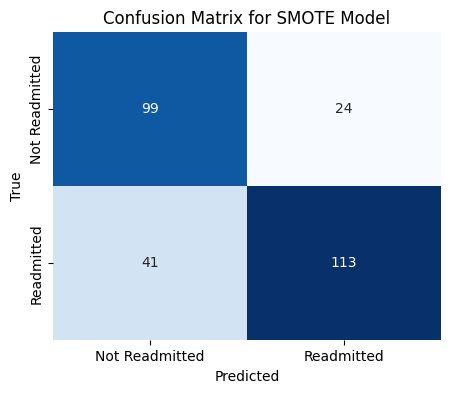

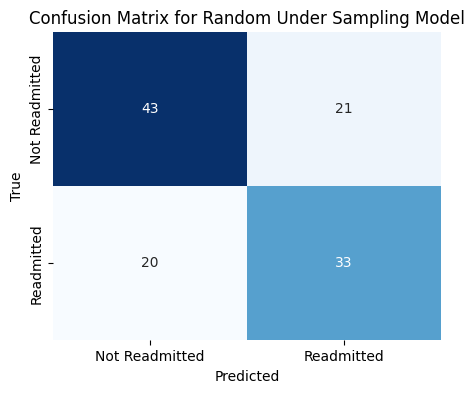

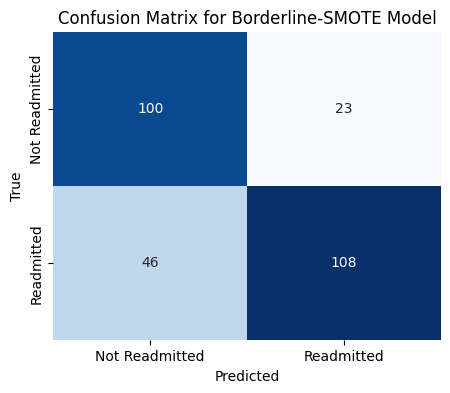

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Step 6: Evaluate the models and store the results
smote_eval = model_smote.evaluate(X_test_res, y_test_res)
rus_eval = model_rus.evaluate(X_test_rus, y_test_rus)
bs_eval = model_bs.evaluate(X_test_bs, y_test_bs)

# Create a DataFrame to hold the evaluation results
evaluation_matrix = pd.DataFrame({
    'Model': ['SMOTE', 'Random Under Sampling', 'Borderline-SMOTE'],
    'Loss': [smote_eval[0], rus_eval[0], bs_eval[0]],
    'Accuracy': [smote_eval[1], rus_eval[1], bs_eval[1]]
})

# Make predictions
y_pred_smote = (model_smote.predict(X_test_res) > 0.5).astype("int32")
y_pred_rus = (model_rus.predict(X_test_rus) > 0.5).astype("int32")
y_pred_bs = (model_bs.predict(X_test_bs) > 0.5).astype("int32")

# Calculate additional metrics
evaluation_matrix['Precision'] = [
    precision_score(y_test_res, y_pred_smote),
    precision_score(y_test_rus, y_pred_rus),
    precision_score(y_test_bs, y_pred_bs)
]

evaluation_matrix['Recall'] = [
    recall_score(y_test_res, y_pred_smote),
    recall_score(y_test_rus, y_pred_rus),
    recall_score(y_test_bs, y_pred_bs)
]

evaluation_matrix['F1 Score'] = [
    f1_score(y_test_res, y_pred_smote),
    f1_score(y_test_rus, y_pred_rus),
    f1_score(y_test_bs, y_pred_bs)
]

# Print the evaluation matrix
print("\nEvaluation Matrix:")
print(evaluation_matrix)

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Not Readmitted', 'Readmitted'],
                yticklabels=['Not Readmitted', 'Readmitted'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Plot confusion matrices for each model
plot_confusion_matrix(y_test_res, y_pred_smote, 'SMOTE Model')
plot_confusion_matrix(y_test_rus, y_pred_rus, 'Random Under Sampling Model')
plot_confusion_matrix(y_test_bs, y_pred_bs, 'Borderline-SMOTE Model')


In [ ]:
!pip install -U scikit-learn

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


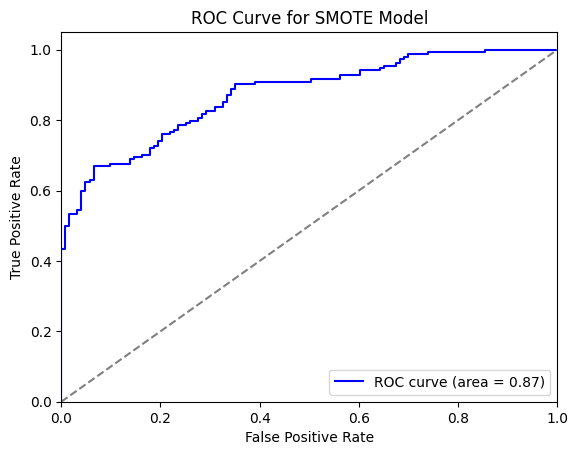

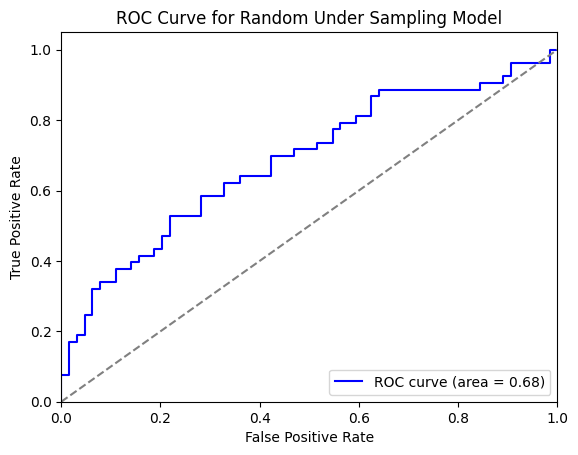

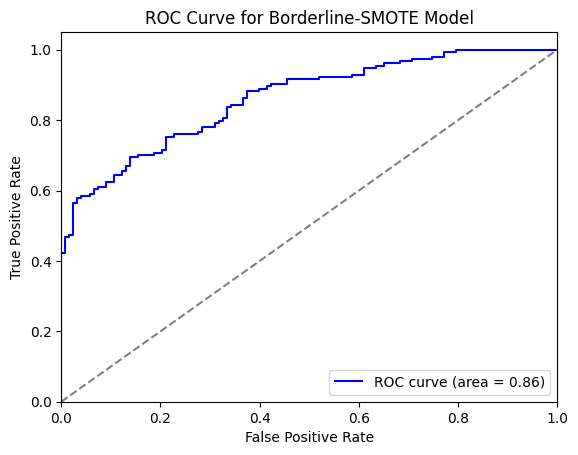


Area Under the ROC Curve:
SMOTE Model: 0.87
Random Under Sampling Model: 0.68
Borderline-SMOTE Model: 0.86


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Function to plot ROC curve
def plot_roc_curve(y_true, y_scores, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc='lower right')
    plt.show()

    return roc_auc

# After fitting your models, get predicted probabilities
y_prob_smote = model_smote.predict(X_test_res).flatten()
y_prob_rus = model_rus.predict(X_test_rus).flatten()
y_prob_bs = model_bs.predict(X_test_bs).flatten()

# Plot ROC curves for each model
roc_auc_smote = plot_roc_curve(y_test_res, y_prob_smote, 'SMOTE Model')
roc_auc_rus = plot_roc_curve(y_test_rus, y_prob_rus, 'Random Under Sampling Model')
roc_auc_bs = plot_roc_curve(y_test_bs, y_prob_bs, 'Borderline-SMOTE Model')

# Reporting AUC values for ROC curve
print("\nArea Under the ROC Curve:")
print(f"SMOTE Model: {roc_auc_smote:.2f}")
print(f"Random Under Sampling Model: {roc_auc_rus:.2f}")
print(f"Borderline-SMOTE Model: {roc_auc_bs:.2f}")


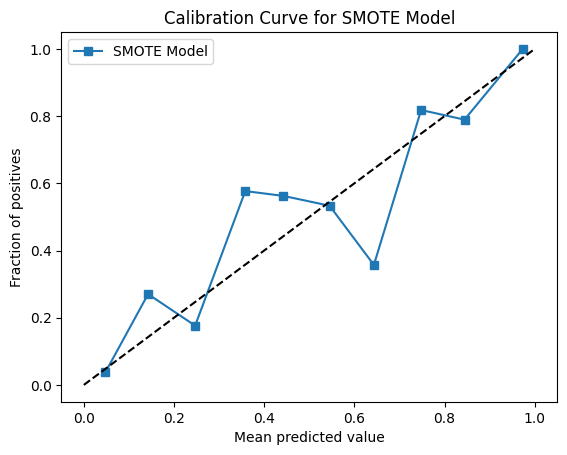

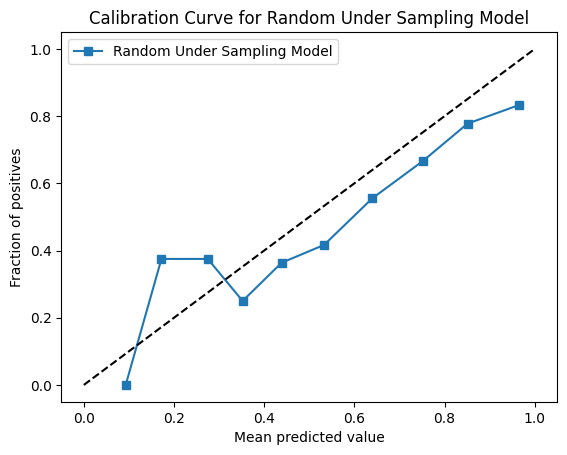

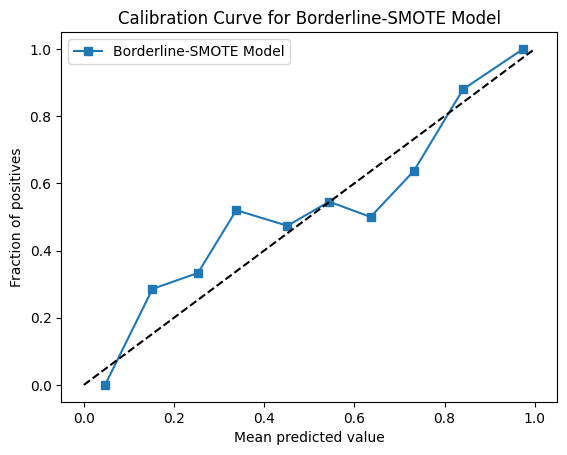

In [24]:
import matplotlib.pyplot as plt

# Function to plot Calibration curve
def plot_calibration_curve(y_true, y_prob, model_name):
    # Binning the predicted probabilities
    bins = np.linspace(0, 1, 11)
    bin_indices = np.digitize(y_prob, bins) - 1

    # Calculate the fraction of positives and mean predicted values for each bin
    fraction_of_positives = np.array([
        np.mean(y_true[bin_indices == i]) if np.any(bin_indices == i) else 0 for i in range(len(bins)-1)
    ])
    mean_predicted_value = np.array([
        np.mean(y_prob[bin_indices == i]) if np.any(bin_indices == i) else 0 for i in range(len(bins)-1)
    ])

    # Plotting the Calibration Curve
    plt.figure()
    plt.plot(mean_predicted_value, fraction_of_positives, "s-", label=model_name)
    plt.plot([0, 1], [0, 1], "k--")  # Diagonal line
    plt.xlabel('Mean predicted value')
    plt.ylabel('Fraction of positives')
    plt.title(f'Calibration Curve for {model_name}')
    plt.legend()
    plt.show()

# Plot Calibration curves for each model
plot_calibration_curve(y_test_res, y_prob_smote, 'SMOTE Model')
plot_calibration_curve(y_test_rus, y_prob_rus, 'Random Under Sampling Model')
plot_calibration_curve(y_test_bs, y_prob_bs, 'Borderline-SMOTE Model')
